In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [62]:
import pandas as pd
df = pd.read_csv('C:\\Users\\mubah\\Desktop\\Thesis\\windows10_dataset.csv')
print(df.shape)
df.head()

(35975, 127)


,ts,Processor_DPC_Rate,Processor_pct_ Idle_Time,Processor_pct_ C3_Time,Processor_pct_ Interrupt_Time,Processor_pct_ C2_Time,Processor_pct_ User_Time,Processor_pct_ C1_Time,Processor_pct_ Processor_Time,Processor_C1_ransitions_sec,...,LogicalDisk(_Total) Avg Disk Write Queue Length,LogicalDisk(_Total) Avg Disk Queue Length,LogicalDisk(_Total) pct_ Disk Read Time,LogicalDisk(_Total) Disk Write Bytes sec,LogicalDisk(_Total) Disk Transfers sec,LogicalDisk(_Total) Avg Disk Bytes Transfer,LogicalDisk(_Total) pct_ Disk Write Time,LogicalDisk(_Total) Avg Disk sec Transfer,label,type
0,1554206309,4,29.90817156,0,0.078240397,0,61.02750947,29.90817156,66.2001486,480.0949912,...,0.134876119,0.163098103,2.822198461,1924988.236,402.5827836,9100.481592,13.48761188,0.000405118,0,normal
1,1554206319,9,31.75168186,0,0.312520973,0,59.14459419,31.75168186,66.24773489,427.0412837,...,0.157564294,0.189279353,3.17150584,1497232.743,355.1343322,11153.55449,15.75642941,0.000532995,0,normal
2,1554206329,5,29.49516707,0,1.16822183,0,46.02794011,29.49516707,66.90038148,1159.426821,...,0.401773775,0.782471877,38.06981014,1854228.536,760.4317685,26994.26595,40.17737752,0.001028323,0,normal
3,1554206339,12,18.22437505,0,1.097191902,0,47.80621859,18.22437505,79.54520811,736.622011,...,0.259062331,0.768934004,50.98716725,15912390.29,699.4999538,53141.6638,25.90623311,0.001099429,0,normal
4,1554206349,12,14.86118688,0,1.562431019,0,41.8731513,14.86118688,82.73513724,896.1085985,...,0.103836186,1.081729712,97.7893526,23609299.7,1184.550425,40988.68444,10.38361856,0.000912738,0,normal


In [63]:
df.drop(['type','ts'], inplace = True, axis = 1)

In [64]:
df = df.astype(str)

In [65]:
df.head()

,Processor_DPC_Rate,Processor_pct_ Idle_Time,Processor_pct_ C3_Time,Processor_pct_ Interrupt_Time,Processor_pct_ C2_Time,Processor_pct_ User_Time,Processor_pct_ C1_Time,Processor_pct_ Processor_Time,Processor_C1_ransitions_sec,Processor_pct_ DPC_Time,...,LogicalDisk(_Total) Avg Disk Bytes Read,LogicalDisk(_Total) Avg Disk Write Queue Length,LogicalDisk(_Total) Avg Disk Queue Length,LogicalDisk(_Total) pct_ Disk Read Time,LogicalDisk(_Total) Disk Write Bytes sec,LogicalDisk(_Total) Disk Transfers sec,LogicalDisk(_Total) Avg Disk Bytes Transfer,LogicalDisk(_Total) pct_ Disk Write Time,LogicalDisk(_Total) Avg Disk sec Transfer,label
0,4,29.90817156,0,0.078240397,0,61.02750947,29.90817156,66.2001486,480.0949912,0.078240397,...,20546.65089,0.134876119,0.163098103,2.822198461,1924988.236,402.5827836,9100.481592,13.48761188,0.000405118,0
1,9,31.75168186,0,0.312520973,0,59.14459419,31.75168186,66.24773489,427.0412837,0.078130243,...,25742.31139,0.157564294,0.189279353,3.17150584,1497232.743,355.1343322,11153.55449,15.75642941,0.000532995,0
2,5,29.49516707,0,1.16822183,0,46.02794011,29.49516707,66.90038148,1159.426821,0.233644366,...,35969.10535,0.401773775,0.782471877,38.06981014,1854228.536,760.4317685,26994.26595,40.17737752,0.001028323,0
3,12,18.22437505,0,1.097191902,0,47.80621859,18.22437505,79.54520811,736.622011,0.313483401,...,40019.44778,0.259062331,0.768934004,50.98716725,15912390.29,699.4999538,53141.6638,25.90623311,0.001099429,0
4,12,14.86118688,0,1.562431019,0,41.8731513,14.86118688,82.73513724,896.1085985,0.703093958,...,32025.59015,0.103836186,1.081729712,97.7893526,23609299.7,1184.550425,40988.68444,10.38361856,0.000912738,0


In [66]:
df.dtypes

Processor_DPC_Rate                                                 object
Processor_pct_ Idle_Time                                           object
Processor_pct_ C3_Time                                             object
Processor_pct_ Interrupt_Time                                      object
Processor_pct_ C2_Time                                             object
Processor_pct_ User_Time                                           object
Processor_pct_ C1_Time                                             object
Processor_pct_ Processor_Time                                      object
Processor_C1_ransitions_sec                                        object
Processor_pct_ DPC_Time                                            object
Processor_C2_ransitions_sec                                        object
Processor_pct_ Privileged_Time                                     object
Processor_C3_ransitions_sec                                        object
Processor_DPCs_Queued_sec             

In [67]:
df = df[~df.applymap(lambda x: x.strip()).eq('').any(axis=1)]

In [11]:
# df = df[~df[['Process_IO Read_Operations_sec']].str.strip().eq('')]

In [68]:
print(df['Process_IO Read_Operations_sec'].str.strip().eq('').value_counts())

False    35214
Name: Process_IO Read_Operations_sec, dtype: int64


In [14]:
# columns_with_spaces = df.columns[df.apply(lambda x: x.str.isspace().any())]
# print(columns_with_spaces)

In [15]:
# columns_with_spaces = windows.columns[windows.apply(lambda x: x.str.isspace().any())]
# print(columns_with_spaces)

In [69]:
df.shape

(35214, 125)

In [24]:
# from sklearn.impute import SimpleImputer
# impute = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=-1)
# # Imputing Columns 1 to 24
# impute.fit(df.iloc[:,1:126])
# df.iloc[:,1:126] = impute.transform(df.iloc[:,1:126])

In [25]:
# from sklearn.impute import SimpleImputer
# impute = SimpleImputer(missing_values= ' ', strategy='constant', fill_value = -1)

# # Imputing Columns 1 to 24
# impute.fit(df.iloc[:,1:126])
# df.iloc[:,1:126] = impute.transform(df.iloc[:,1:126])

In [40]:
df.shape

(35214, 125)

In [71]:
df = df.astype(float)

In [72]:
df.dtypes

Processor_DPC_Rate                                                 float64
Processor_pct_ Idle_Time                                           float64
Processor_pct_ C3_Time                                             float64
Processor_pct_ Interrupt_Time                                      float64
Processor_pct_ C2_Time                                             float64
Processor_pct_ User_Time                                           float64
Processor_pct_ C1_Time                                             float64
Processor_pct_ Processor_Time                                      float64
Processor_C1_ransitions_sec                                        float64
Processor_pct_ DPC_Time                                            float64
Processor_C2_ransitions_sec                                        float64
Processor_pct_ Privileged_Time                                     float64
Processor_C3_ransitions_sec                                        float64
Processor_DPCs_Queued_sec

<AxesSubplot:>

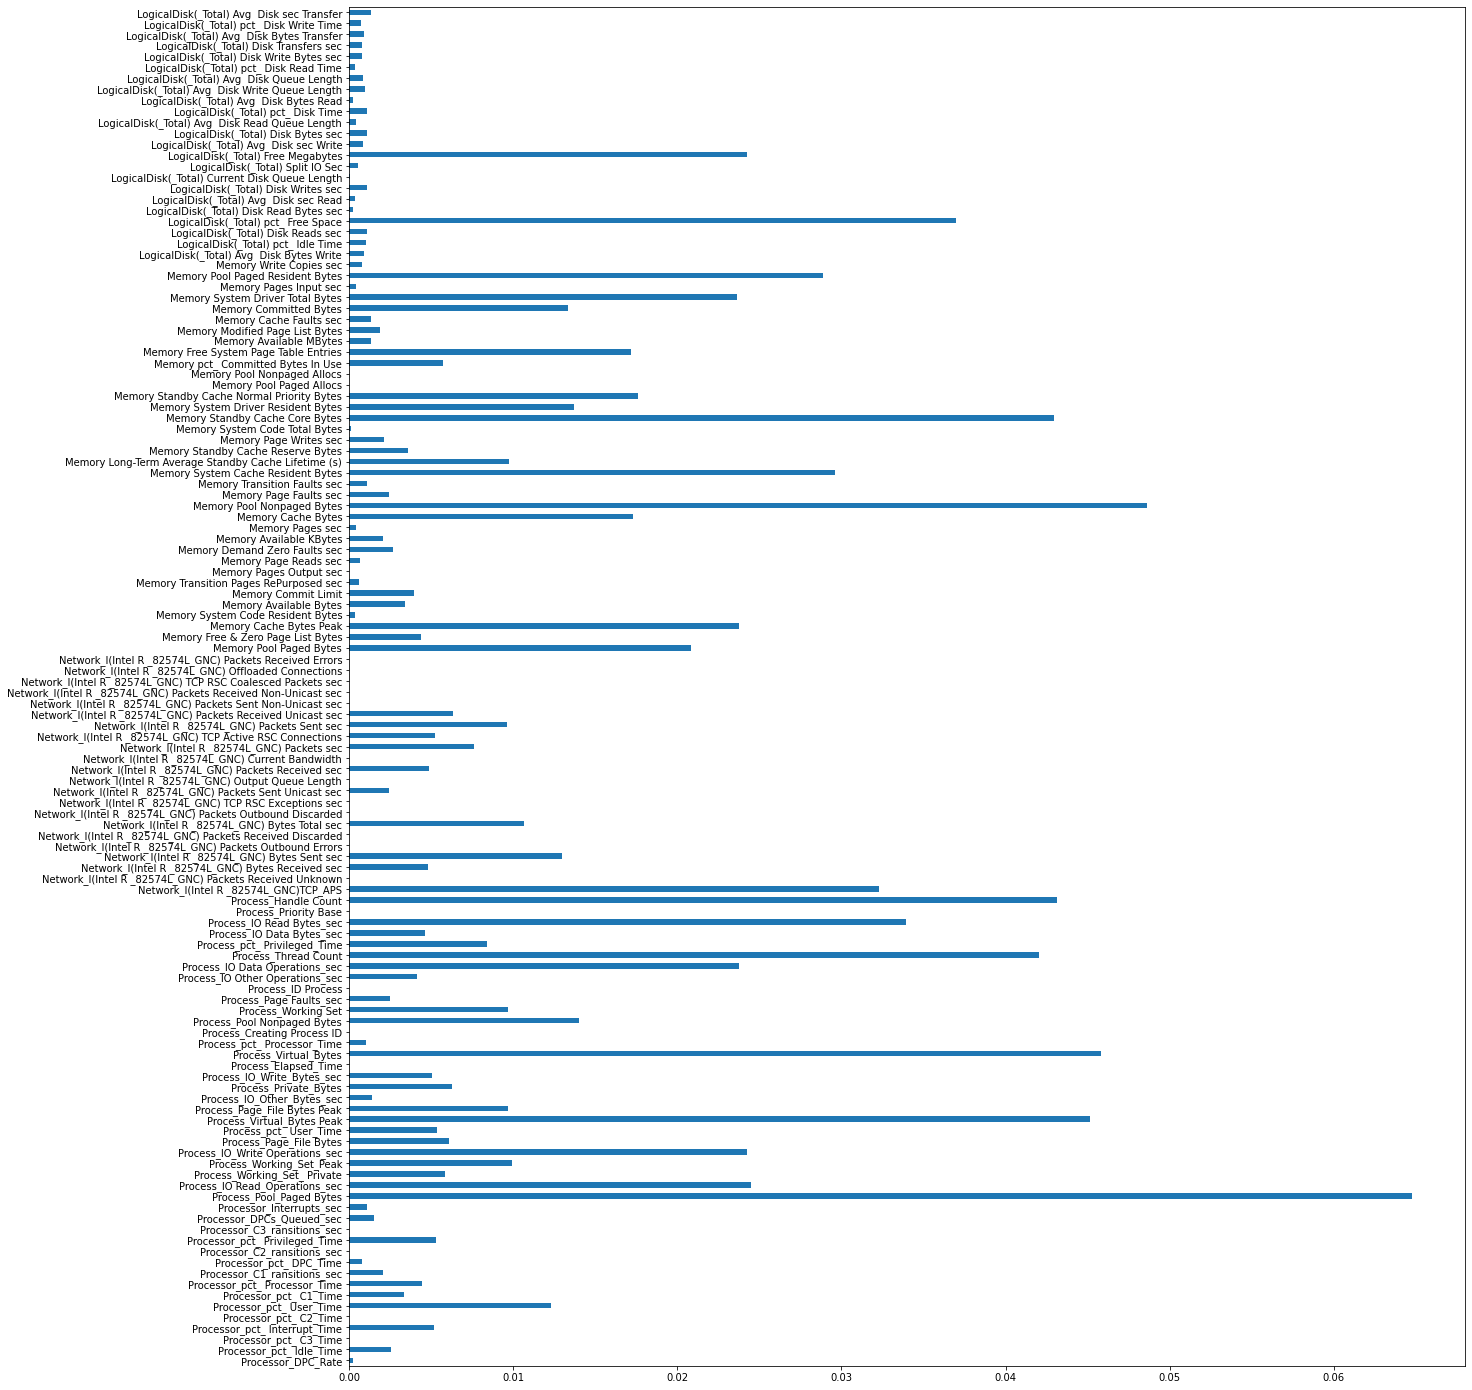

In [73]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
X = df.drop('label', axis=1)
y = df['label']
model = RandomForestClassifier()
model.fit(X, y)
(pd.Series(model.feature_importances_, index=X.columns)
   # .nlargest(4)
   .plot(kind='barh',figsize = (20, 25) ))

In [75]:
df.columns.values.tolist()

['Processor_DPC_Rate',
 'Processor_pct_ Idle_Time',
 'Processor_pct_ C3_Time',
 'Processor_pct_ Interrupt_Time',
 'Processor_pct_ C2_Time',
 'Processor_pct_ User_Time',
 'Processor_pct_ C1_Time',
 'Processor_pct_ Processor_Time',
 'Processor_C1_ransitions_sec',
 'Processor_pct_ DPC_Time',
 'Processor_C2_ransitions_sec',
 'Processor_pct_ Privileged_Time',
 'Processor_C3_ransitions_sec',
 'Processor_DPCs_Queued_sec',
 'Processor_Interrupts_sec',
 'Process_Pool_Paged Bytes',
 'Process_IO Read_Operations_sec',
 'Process_Working_Set_ Private',
 'Process_Working_Set_Peak',
 'Process_IO_Write Operations_sec',
 'Process_Page_File Bytes',
 'Process_pct_ User_Time',
 'Process_Virtual_Bytes Peak',
 'Process_Page_File Bytes Peak',
 'Process_IO_Other_Bytes_sec',
 'Process_Private_Bytes',
 'Process_IO_Write_Bytes_sec',
 'Process_Elapsed_Time',
 'Process_Virtual_Bytes',
 'Process_pct_ Processor_Time',
 'Process_Creating Process ID',
 'Process_Pool Nonpaged Bytes',
 'Process_Working Set',
 'Process_Pa

In [46]:
#dropping all the columns with <0.01 
# df = df.loc[:, ['LogicalDisk(_Total) Free Megabytes' , 'LogicalDisk(_Total) pct_ Free Space' , 'Memory Pool Paged Resident Bytes', 'Memory System Driver Total Bytes' ,'Memory Committed Bytes' , 'Memory Free System Page Table Entries', 'Memory Standby Cache Core Bytes','Memory System Driver Resident Bytes','Memory Standby Cache Normal Priority Bytes', 'Memory Long-Term Average Standby Cache Lifetime (s)', 'Memory Free System Page Table Entries','Memory System Cache Resident Bytes' , 'Memory Pool Nonpaged Bytes', 'Memory Cache Bytes', 'Memory Pool Paged Bytes','Memory Cache Bytes Peak', 'Network_I(Intel R _82574L_GNC) Bytes Sent sec' ,'Network_I(Intel R _82574L_GNC)TCP_APS','Process_IO Read Bytes_sec','Process_Handle Count','Process_IO Data Operations_sec','Process_Thread Count','Process_Pool Nonpaged Bytes','Process_Working Set','Process_Virtual_Bytes','Process_pct_ User_Time','Process_Virtual_Bytes Peak','Process_Working_Set_Peak','Process_IO_Write Operations_sec' ,'Process_Pool_Paged Bytes','Process_IO Read_Operations_sec', 'label' ]]

<AxesSubplot:>

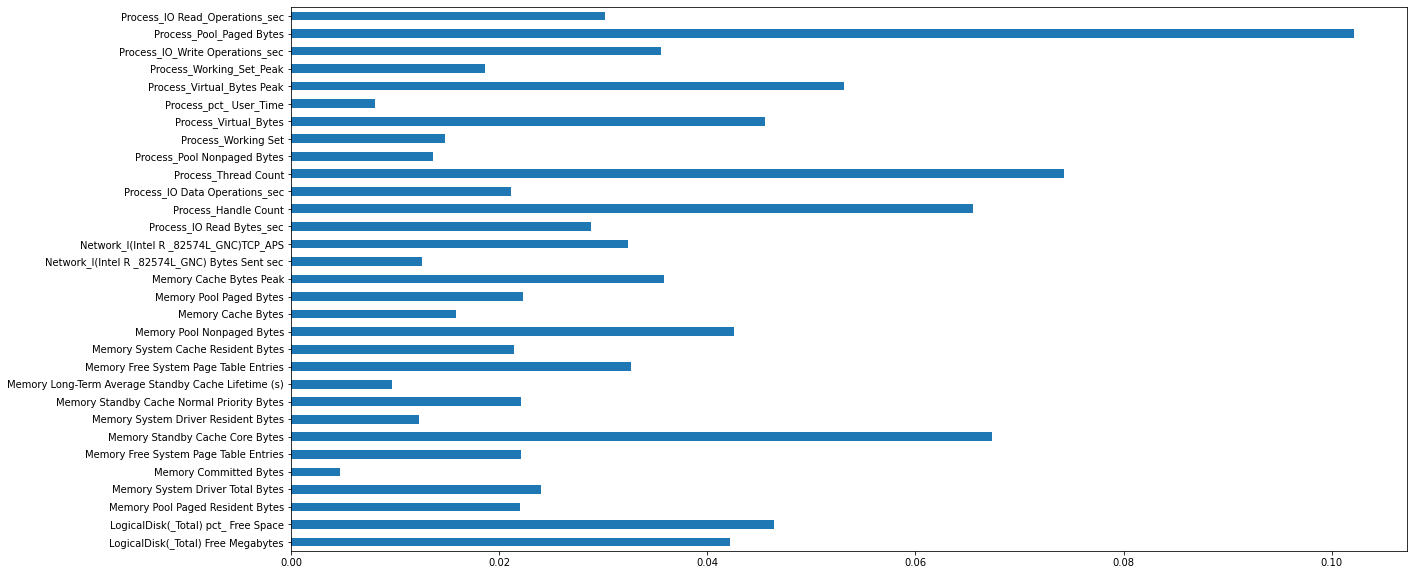

In [47]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

X = df.drop('label', axis=1)
y = df['label']

model = RandomForestClassifier()
model.fit(X, y)

(pd.Series(model.feature_importances_, index=X.columns)
   .plot(kind='barh',figsize = (20, 10) ))

<AxesSubplot:>

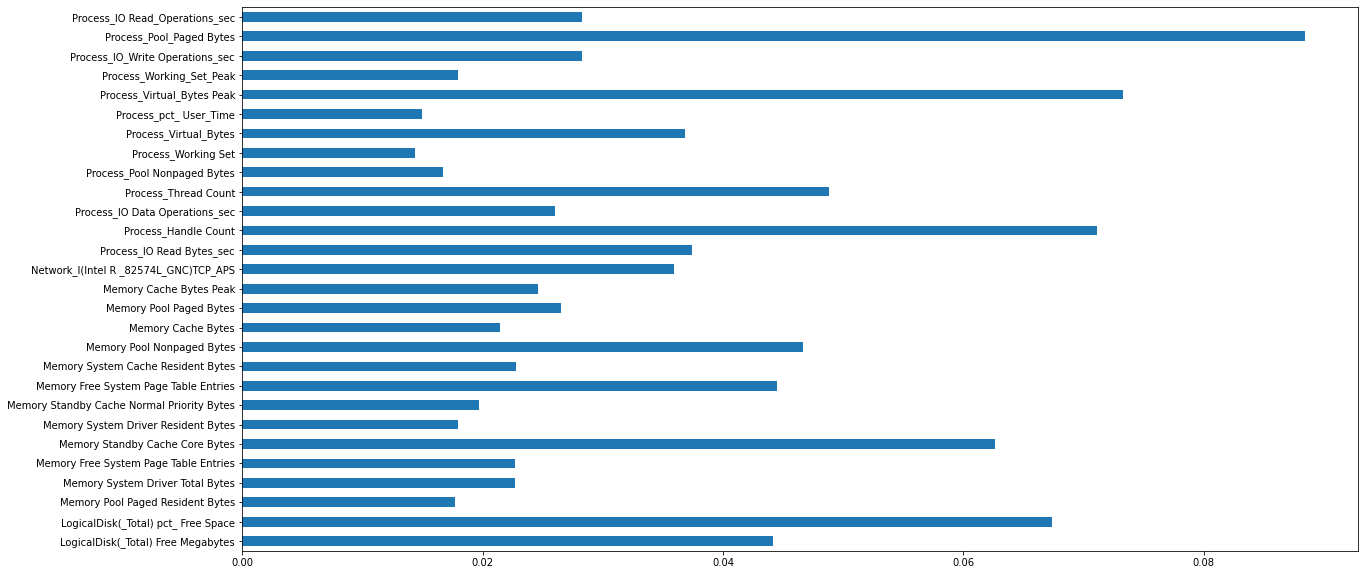

In [48]:
# further checking and dropping 
df1 = df.drop([ 'Network_I(Intel R _82574L_GNC) Bytes Sent sec','Memory Long-Term Average Standby Cache Lifetime (s)','Memory Committed Bytes' ], axis=1)
import pandas as pd
from sklearn.ensemble import RandomForestClassifier



X = df1.drop('label', axis=1)
y = df1['label']

model = RandomForestClassifier()
model.fit(X, y)

(pd.Series(model.feature_importances_, index=X.columns)
   # .nlargest(4)
   .plot(kind='barh',figsize = (20, 10) ))

<AxesSubplot:>

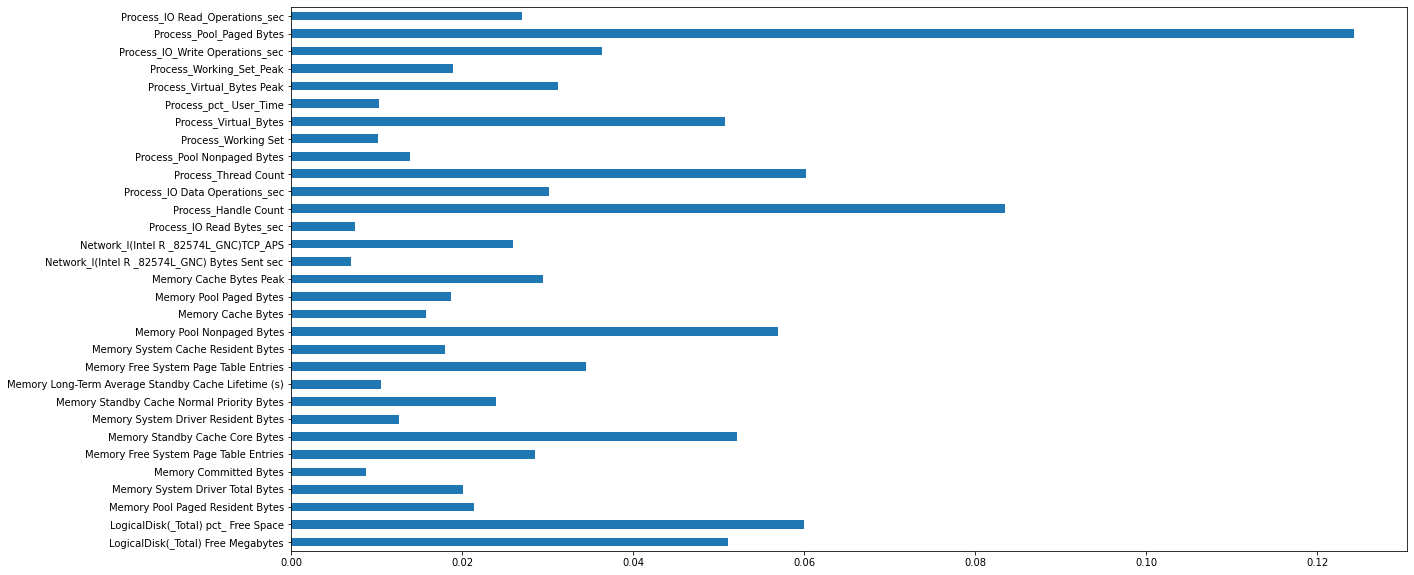

In [49]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier



X = df.drop('label', axis=1)
y = df['label']

model = RandomForestClassifier()
model.fit(X, y)

(pd.Series(model.feature_importances_, index=X.columns)
   # .nlargest(4)
   .plot(kind='barh',figsize = (20, 10) ))

In [76]:
df.corr()

,Processor_DPC_Rate,Processor_pct_ Idle_Time,Processor_pct_ C3_Time,Processor_pct_ Interrupt_Time,Processor_pct_ C2_Time,Processor_pct_ User_Time,Processor_pct_ C1_Time,Processor_pct_ Processor_Time,Processor_C1_ransitions_sec,Processor_pct_ DPC_Time,...,LogicalDisk(_Total) Avg Disk Bytes Read,LogicalDisk(_Total) Avg Disk Write Queue Length,LogicalDisk(_Total) Avg Disk Queue Length,LogicalDisk(_Total) pct_ Disk Read Time,LogicalDisk(_Total) Disk Write Bytes sec,LogicalDisk(_Total) Disk Transfers sec,LogicalDisk(_Total) Avg Disk Bytes Transfer,LogicalDisk(_Total) pct_ Disk Write Time,LogicalDisk(_Total) Avg Disk sec Transfer,label
Processor_DPC_Rate,1.000000,-0.282400,NaN,0.078619,NaN,0.027659,-0.282400,0.220155,0.701447,0.507265,...,0.009188,0.112232,0.699499,0.656517,0.531619,0.753304,-0.008271,0.044677,0.004265,-0.146711
Processor_pct_ Idle_Time,-0.282400,1.000000,NaN,-0.417281,NaN,-0.838182,1.000000,-0.992787,-0.281222,-0.377916,...,-0.209631,-0.119027,-0.314295,-0.307868,-0.387026,-0.375648,-0.037402,-0.061407,-0.097855,-0.033981
Processor_pct_ C3_Time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Processor_pct_ Interrupt_Time,0.078619,-0.417281,NaN,1.000000,NaN,0.193281,-0.417281,0.409329,0.123350,0.453677,...,0.068734,0.121252,0.073964,0.114396,0.198388,0.063065,0.131673,0.103083,0.094209,0.220348
Processor_pct_ C2_Time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Processor_pct_ User_Time,0.027659,-0.838182,NaN,0.193281,NaN,1.000000,-0.838182,0.865198,-0.053712,0.101265,...,0.235030,0.020360,0.020309,0.035624,0.104669,0.063654,0.046581,-0.000794,0.061015,-0.073069
Processor_pct_ C1_Time,-0.282400,1.000000,NaN,-0.417281,NaN,-0.838182,1.000000,-0.992787,-0.281222,-0.377916,...,-0.209631,-0.119027,-0.314295,-0.307868,-0.387026,-0.375648,-0.037402,-0.061407,-0.097855,-0.033981
Processor_pct_ Processor_Time,0.220155,-0.992787,NaN,0.409329,NaN,0.865198,-0.992787,1.000000,0.202271,0.332939,...,0.209247,0.071026,0.226042,0.228939,0.320573,0.310885,0.041863,0.017497,0.069953,0.041875
Processor_C1_ransitions_sec,0.701447,-0.281222,NaN,0.123350,NaN,-0.053712,-0.281222,0.202271,1.000000,0.481264,...,0.034739,0.191938,0.749036,0.704551,0.698957,0.888051,0.011898,0.120307,-0.013306,-0.200324
Processor_pct_ DPC_Time,0.507265,-0.377916,NaN,0.453677,NaN,0.101265,-0.377916,0.332939,0.481264,1.000000,...,0.032024,0.062316,0.489814,0.463404,0.363947,0.479105,0.189536,0.016805,0.057454,0.045480


In [77]:
df.shape

(35214, 125)

<AxesSubplot:>

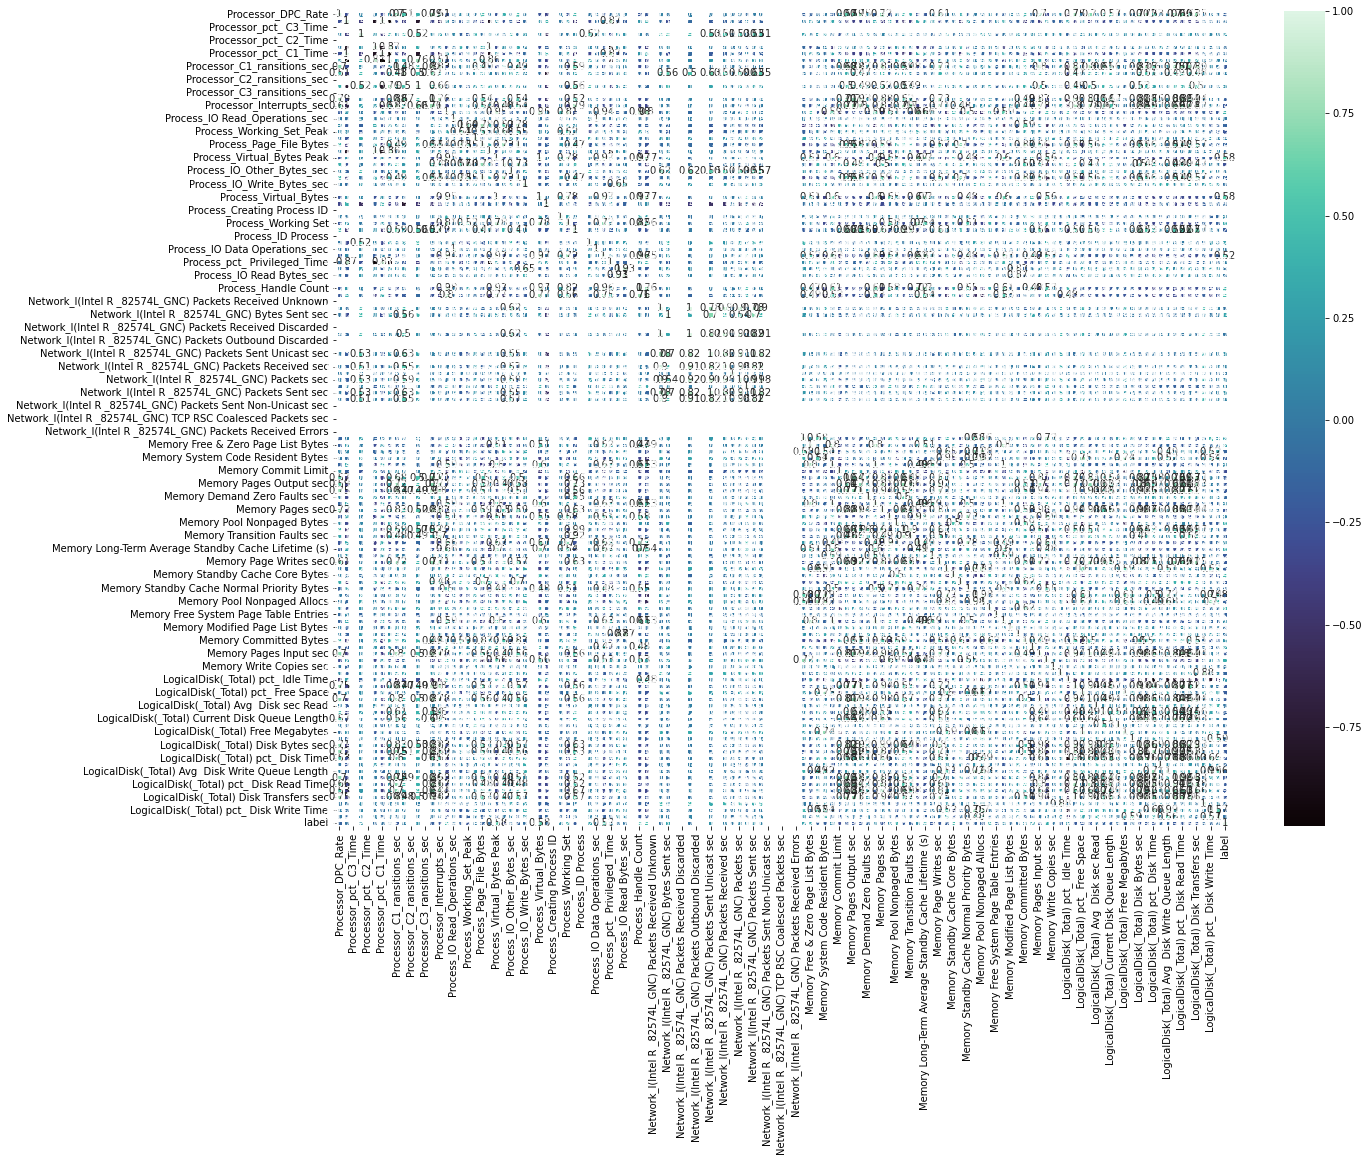

In [78]:
# df = df.loc[:, ['Memory Pool Paged Resident Bytes','Memory System Driver Total Bytes', 'Memory Standby Cache Core Bytes', 'Memory Long-Term Average Standby Cache Lifetime (s)','Memory Pool Nonpaged Bytes','Memory Pool Paged Bytes','Network_I(Intel R _82574L_GNC) Bytes Sent sec' ,'Network_I(Intel R _82574L_GNC)TCP_APS', 'Process_Handle Count','Process_Thread Count','Process_Working Set','Process_Virtual_Bytes','Process_Virtual_Bytes Peak','Process_Working_Set_Peak', 'Process_Pool_Paged Bytes', 'label']]
#---corelation heatmap----
import seaborn as sns
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True, linewidth = 3, cmap='mako')

In [ ]:
# #---corelation heatmap----
# plt.figure(figsize=(20, 15))
# sns.heatmap(df.corr(), annot=True, linewidth = 3, cmap='mako')

In [79]:
df.head(100)

,Processor_DPC_Rate,Processor_pct_ Idle_Time,Processor_pct_ C3_Time,Processor_pct_ Interrupt_Time,Processor_pct_ C2_Time,Processor_pct_ User_Time,Processor_pct_ C1_Time,Processor_pct_ Processor_Time,Processor_C1_ransitions_sec,Processor_pct_ DPC_Time,...,LogicalDisk(_Total) Avg Disk Bytes Read,LogicalDisk(_Total) Avg Disk Write Queue Length,LogicalDisk(_Total) Avg Disk Queue Length,LogicalDisk(_Total) pct_ Disk Read Time,LogicalDisk(_Total) Disk Write Bytes sec,LogicalDisk(_Total) Disk Transfers sec,LogicalDisk(_Total) Avg Disk Bytes Transfer,LogicalDisk(_Total) pct_ Disk Write Time,LogicalDisk(_Total) Avg Disk sec Transfer,label
0,4.0,29.908172,0.0,0.078240,0.0,61.027509,29.908172,66.200149,480.094991,0.078240,...,20546.650890,0.134876,0.163098,2.822198,1.924988e+06,402.582784,9100.481592,13.487612,0.000405,0.0
1,9.0,31.751682,0.0,0.312521,0.0,59.144594,31.751682,66.247735,427.041284,0.078130,...,25742.311390,0.157564,0.189279,3.171506,1.497233e+06,355.134332,11153.554490,15.756429,0.000533,0.0
2,5.0,29.495167,0.0,1.168222,0.0,46.027940,29.495167,66.900381,1159.426821,0.233644,...,35969.105350,0.401774,0.782472,38.069810,1.854229e+06,760.431768,26994.265950,40.177378,0.001028,0.0
3,12.0,18.224375,0.0,1.097192,0.0,47.806219,18.224375,79.545208,736.622011,0.313483,...,40019.447780,0.259062,0.768934,50.987167,1.591239e+07,699.499954,53141.663800,25.906233,0.001099,0.0
4,12.0,14.861187,0.0,1.562431,0.0,41.873151,14.861187,82.735137,896.108598,0.703094,...,32025.590150,0.103836,1.081730,97.789353,2.360930e+07,1184.550425,40988.684440,10.383619,0.000913,0.0
5,19.0,22.657346,0.0,0.781280,0.0,39.454652,22.657346,74.061496,807.794015,0.234384,...,36368.133170,0.151794,0.804626,65.283183,1.283909e+07,788.780033,47320.635370,15.179443,0.001021,0.0
6,9.0,19.296817,0.0,2.734334,0.0,35.077595,19.296817,75.781616,1665.275721,0.624991,...,16248.933500,0.072069,1.082287,101.021753,2.044406e+07,1103.615271,32610.079580,7.206940,0.000981,0.0
7,3.0,28.374642,0.0,0.312496,0.0,52.186774,28.374642,69.453550,402.292858,0.078124,...,43995.891500,0.048437,0.142110,9.367386,1.269656e+07,304.294597,57715.170560,4.843659,0.000467,0.0
8,3.0,23.961375,0.0,0.624038,0.0,39.626426,23.961375,72.854338,2141.205491,0.234014,...,46653.692920,0.098541,0.251544,15.300358,1.462362e+07,439.024507,65097.941320,9.854080,0.000573,0.0
9,3.0,61.473132,0.0,0.704204,0.0,21.047862,61.473132,36.308699,2936.251094,0.234735,...,5065.711085,0.004243,0.740462,73.621908,3.435608e+03,2808.056763,5065.308510,0.424339,0.000264,0.0


In [ ]:
# Standardized bell curve being followed or not
import matplotlib.pyplot as plt
columns = df.columns
for col in columns:
    print("col: ", col)
    df[col].hist()
    plt.show()

In [81]:
df.head()

,Processor_DPC_Rate,Processor_pct_ Idle_Time,Processor_pct_ C3_Time,Processor_pct_ Interrupt_Time,Processor_pct_ C2_Time,Processor_pct_ User_Time,Processor_pct_ C1_Time,Processor_pct_ Processor_Time,Processor_C1_ransitions_sec,Processor_pct_ DPC_Time,...,LogicalDisk(_Total) Avg Disk Bytes Read,LogicalDisk(_Total) Avg Disk Write Queue Length,LogicalDisk(_Total) Avg Disk Queue Length,LogicalDisk(_Total) pct_ Disk Read Time,LogicalDisk(_Total) Disk Write Bytes sec,LogicalDisk(_Total) Disk Transfers sec,LogicalDisk(_Total) Avg Disk Bytes Transfer,LogicalDisk(_Total) pct_ Disk Write Time,LogicalDisk(_Total) Avg Disk sec Transfer,label
0,4.0,29.908172,0.0,0.078240,0.0,61.027509,29.908172,66.200149,480.094991,0.078240,...,20546.65089,0.134876,0.163098,2.822198,1.924988e+06,402.582784,9100.481592,13.487612,0.000405,0.0
1,9.0,31.751682,0.0,0.312521,0.0,59.144594,31.751682,66.247735,427.041284,0.078130,...,25742.31139,0.157564,0.189279,3.171506,1.497233e+06,355.134332,11153.554490,15.756429,0.000533,0.0
2,5.0,29.495167,0.0,1.168222,0.0,46.027940,29.495167,66.900381,1159.426821,0.233644,...,35969.10535,0.401774,0.782472,38.069810,1.854229e+06,760.431768,26994.265950,40.177378,0.001028,0.0
3,12.0,18.224375,0.0,1.097192,0.0,47.806219,18.224375,79.545208,736.622011,0.313483,...,40019.44778,0.259062,0.768934,50.987167,1.591239e+07,699.499954,53141.663800,25.906233,0.001099,0.0
4,12.0,14.861187,0.0,1.562431,0.0,41.873151,14.861187,82.735137,896.108598,0.703094,...,32025.59015,0.103836,1.081730,97.789353,2.360930e+07,1184.550425,40988.684440,10.383619,0.000913,0.0


In [ ]:
# checking relevance using scatterplot
import matplotlib.pyplot as plt
columns = df.columns
for col in columns:
    print("col: ", col)
    plt.scatter(df.index, df[col])
    plt.show()

In [ ]:
df = df.loc[:, ['LogicalDisk(_Total) Free Megabytes', 'LogicalDisk(_Total) pct_ Free Space','Memory Pool Paged Resident Bytes','Memory Committed Bytes','Memory Standby Cache Core Bytes',
'Memory Standby Cache Normal Priority Bytes','Memory Long-Term Average Standby Cache Lifetime (s)','Memory Cache Bytes''Network_I(Intel R _82574L_GNC) Bytes Sent sec',
'Process_IO Read Bytes_sec','Process_IO Data Operations_sec','Process_Pool Nonpaged Bytes','Process_pct_ User_Time','Process_IO_Write Operations_sec','Process_IO Read_Operations_sec','label']]

In [ ]:
#code to remove the outliars from the scatter plot:
from scipy import stats

xmin = X.min()

xmax = X.max()

ymin = y.min()

ymax = y.max()

#Perform a kernel density estimate on the data:

X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

positions = np.vstack([X.ravel(), Y.ravel()])

values = np.vstack([X, y])

kernel = stats.gaussian_kde(values)

Z = np.reshape(kernel(positions).T, X.shape)